In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/learnplatform-covid19-impact-on-digital-learning/products_info.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/README.md
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/districts_info.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/6345.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/9812.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/2339.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/5404.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/5150.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/1624.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/3188.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/7964.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learni

### load the data

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objs as go

In [5]:
districts = pd.read_csv('/kaggle/input/learnplatform-covid19-impact-on-digital-learning/districts_info.csv')

In [6]:
districts.head()

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000["
1,2685,NaN,NaN,NaN,NaN,NaN,NaN
2,4921,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[6000, 8000["
3,3188,NaN,NaN,NaN,NaN,NaN,NaN
4,2238,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
districts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   district_id               233 non-null    int64 
 1   state                     176 non-null    object
 2   locale                    176 non-null    object
 3   pct_black/hispanic        176 non-null    object
 4   pct_free/reduced          148 non-null    object
 5   county_connections_ratio  162 non-null    object
 6   pp_total_raw              118 non-null    object
dtypes: int64(1), object(6)
memory usage: 12.9+ KB


In [8]:
districts.isnull().sum()

district_id                   0
state                        57
locale                       57
pct_black/hispanic           57
pct_free/reduced             85
county_connections_ratio     71
pp_total_raw                115
dtype: int64

In [9]:
district = districts.dropna(axis=0)

In [10]:
district.head(5)

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000["
2,4921,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[6000, 8000["
5,5987,Wisconsin,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[10000, 12000["
6,3710,Utah,Suburb,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[6000, 8000["
7,7177,North Carolina,Suburb,"[0.2, 0.4[","[0.2, 0.4[","[0.18, 1[","[8000, 10000["


### Data EDA 

In [11]:
px.bar(district['state'].value_counts()[:10].reset_index(), x='index', y='state', text='state', labels={'index':'state', 'state':'count'}, title='Top 10 states distribution (count)')

In [12]:
fig = px.pie(district['state'].value_counts()[:10].reset_index(), values='state', names='index',labels={'index':'state', 'state':'count'}, title='Top 10 states distribution (percentage)', )
fig.update_traces(textinfo='label+percent')

In [13]:
state_abb = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District Of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

In [14]:
district['state_abbres'] = district['state'].replace(state_abb)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [15]:
fig = px.choropleth(data_frame=district['state_abbres'].value_counts().reset_index(), locations='index', color='state_abbres',locationmode='USA-states', scope='usa',labels={'index':'States', 'state_abbres':'Count'},hover_name='index', title='Count of districts in the available States',basemap_visible=True,featureidkey='index')
fig.update_traces(text='index')
fig.show()

In [16]:
px.bar(district['locale'].value_counts().reset_index(), x='index', y='locale', text='locale', labels={'index':'locale', 'locale':'count'},
      title='The count of districts in each type of areas (count)')

In [17]:
fig = px.pie(district['locale'].value_counts().reset_index(), values='locale', names='index', title='The count of districts in each type of areas (in percentage)')
fig.update_traces(textinfo='label+percent')

In [18]:
district['pct_black/hispanic'] = district['pct_black/hispanic'].apply(lambda x: float(x.split(',')[0][1:]) + 0.1)
district['pct_free/reduced'] = district['pct_free/reduced'].apply(lambda x: float(x.split(',')[0][1:]) + 0.1)
district.drop('county_connections_ratio', axis=1, inplace=True)
district['pp_total_raw'] = district['pp_total_raw'].apply(lambda x: int(x.split(',')[0][1:]) + 1000)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

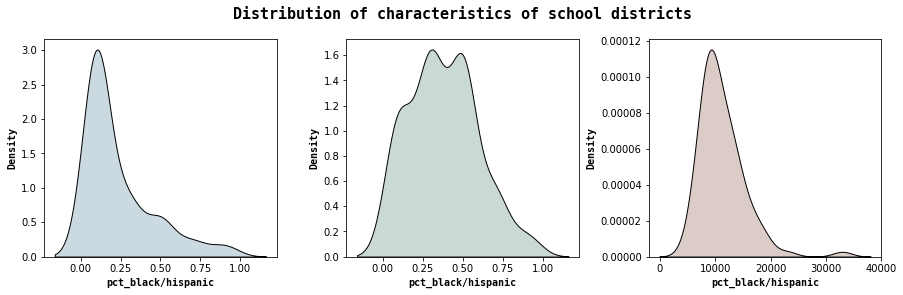

In [72]:
fig, axes = plt.subplots(1,3,figsize=(15,4), gridspec_kw = dict(wspace=0.3))
sns.kdeplot(district['pct_black/hispanic'], shade=True,edgecolor='black', ax=axes[0], color='#336b87')
axes[0].set_xlabel('pct_black/hispanic', font='monospace', weight='semibold')
axes[0].set_ylabel('Density', font='monospace', weight='semibold')
sns.kdeplot(district['pct_free/reduced'], shade=True,edgecolor='black', ax=axes[1], color='#336b58')
axes[1].set_xlabel('pct_black/hispanic', font='monospace', weight='semibold')
axes[1].set_ylabel('Density', font='monospace', weight='semibold')
sns.kdeplot(district['pp_total_raw'], shade=True,edgecolor='black', ax=axes[2], color='#763626')
axes[2].set_xlabel('pct_black/hispanic', font='monospace', weight='semibold')
axes[2].set_ylabel('Density', font='monospace', weight='semibold')
plt.figtext(0.3, 0.95,'Distribution of characteristics of school districts', size=15, font='monospace', weight='semibold');

In [79]:
aggregated = district.iloc[:, 2:6].groupby('locale').mean().reset_index()

In [80]:
aggregated

,locale,pct_black/hispanic,pct_free/reduced,pp_total_raw
0,City,0.366667,0.500000,10166.666667
1,Rural,0.126667,0.380000,13666.666667
2,Suburb,0.250000,0.330769,10961.538462
3,Town,0.122222,0.500000,9888.888889


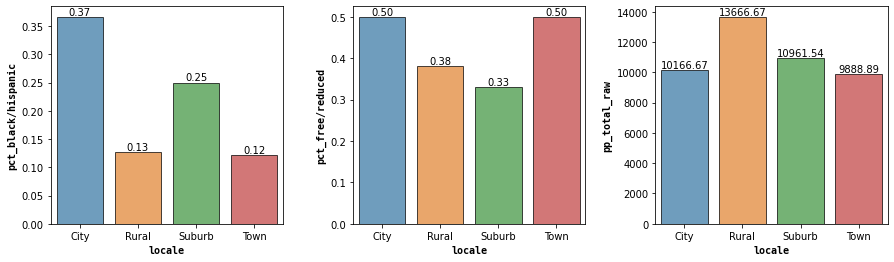

In [110]:
fig, axes = plt.subplots(1,3,figsize=(15,4), gridspec_kw = dict(wspace=0.3))
sns.barplot(data=aggregated, x='locale', y='pct_black/hispanic', ax=axes[0],edgecolor='black',alpha=0.7)
for i in axes[0].containers:
    axes[0].bar_label(i, fmt='%.2f')
axes[0].set_xlabel('locale', font='monospace', weight='semibold')
axes[0].set_ylabel('pct_black/hispanic', font='monospace', weight='semibold')
sns.barplot(data=aggregated, x='locale', y='pct_free/reduced', ax=axes[1],edgecolor='black',alpha=0.7)
for i in axes[1].containers:
    axes[1].bar_label(i, fmt='%.2f')
axes[1].set_xlabel('locale', font='monospace', weight='semibold')
axes[1].set_ylabel('pct_free/reduced', font='monospace', weight='semibold')
sns.barplot(data=aggregated, x='locale', y='pp_total_raw', ax=axes[2],edgecolor='black',alpha=0.7)
for i in axes[2].containers:
    axes[2].bar_label(i, fmt='%.2f')
axes[2].set_xlabel('locale', font='monospace', weight='semibold')
axes[2].set_ylabel('pp_total_raw', font='monospace', weight='semibold');